# Housing Data Analysis

## 1. Data Loading and Preliminary Exploration

Load the dataset and perform a preliminary exploration to understand its structure and contents.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data_path = '/content/housing.csv'
housing_data = pd.read_csv(data_path)

# Display basic information and first few rows
(housing_data.info(), housing_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


(None,
    longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
 0    -122.23     37.88                  41          880           129.0   
 1    -122.22     37.86                  21         7099          1106.0   
 2    -122.24     37.85                  52         1467           190.0   
 3    -122.25     37.85                  52         1274           235.0   
 4    -122.25     37.85                  52         1627           280.0   
 
    population  households  median_income  median_house_value ocean_proximity  
 0         322         126         8.3252              452600        NEAR BAY  
 1        2401        1138         8.3014              358500        NEAR BAY  
 2         496         177         7.2574              352100        NEAR BAY  
 3         558         219         5.6431              341300        NEAR BAY  
 4         565         259         3.8462              342200        NEAR BAY  )

## 2. Data Visualization

Visualize various aspects of the data to understand its characteristics and distributions.

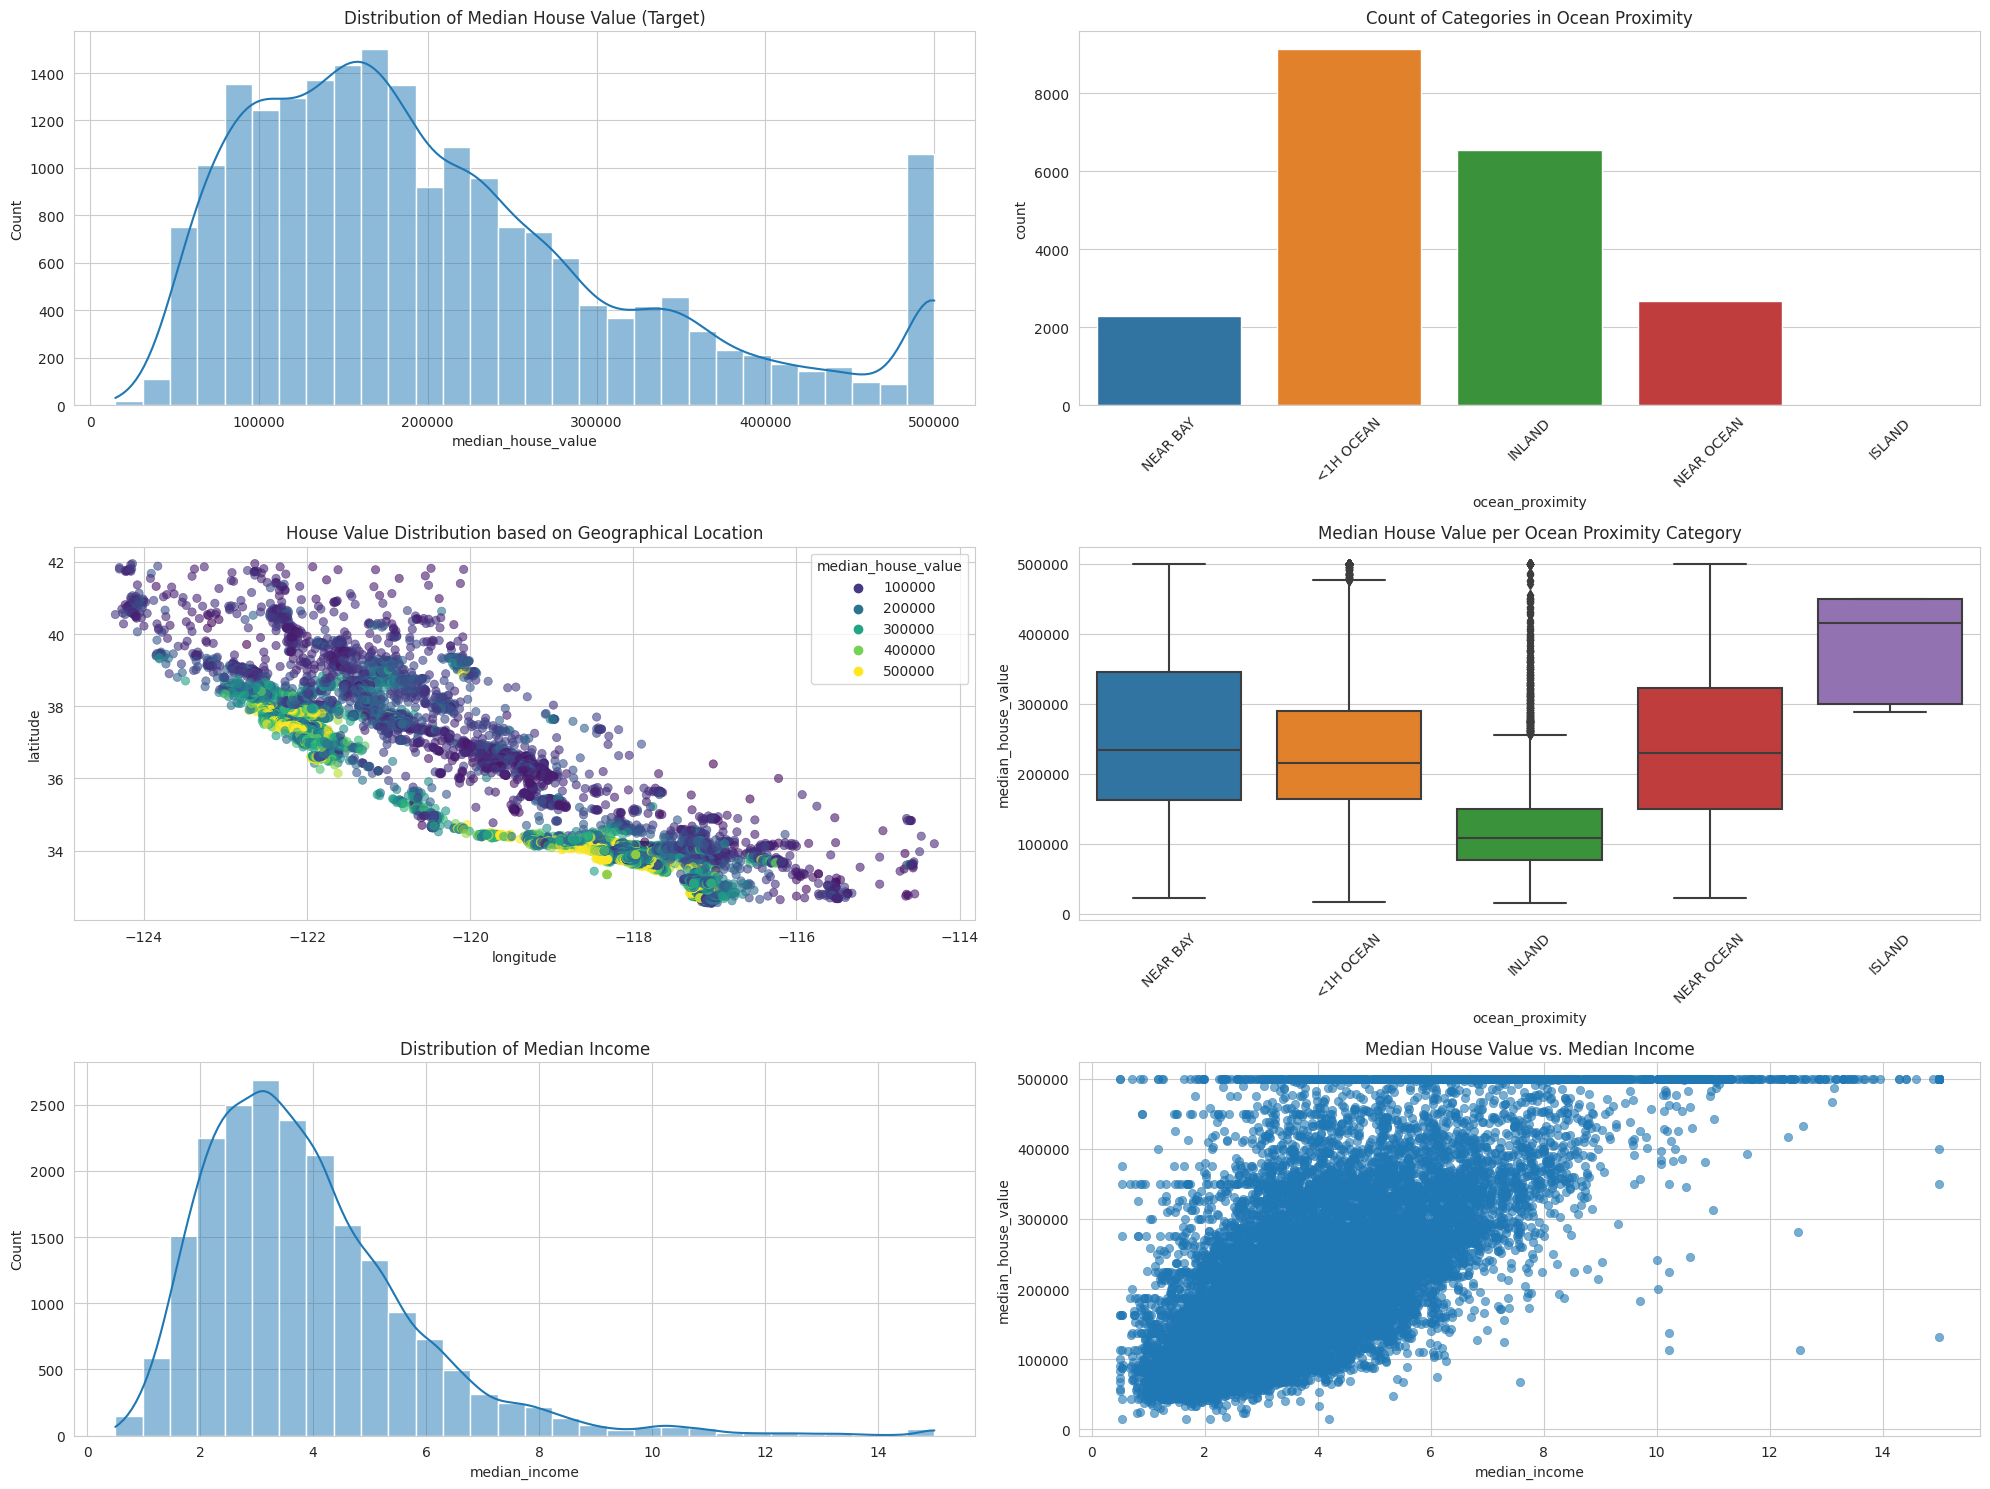

In [16]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Initialize the figure
plt.figure(figsize=(20, 15))

# Create subplots: total 3 rows and 2 columns
plt.subplot(3, 2, 1)
sns.histplot(housing_data['median_house_value'], bins=30, kde=True)
plt.title('Distribution of Median House Value (Target)')

plt.subplot(3, 2, 2)
sns.countplot(x='ocean_proximity', data=housing_data)
plt.title('Count of Categories in Ocean Proximity')
plt.xticks(rotation=45)

plt.subplot(3, 2, 3)
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', palette='viridis',
                data=housing_data, alpha=0.6, edgecolor=None)
plt.title('House Value Distribution based on Geographical Location')

plt.subplot(3, 2, 4)
sns.boxplot(x='ocean_proximity', y='median_house_value', data=housing_data)
plt.title('Median House Value per Ocean Proximity Category')
plt.xticks(rotation=45)

plt.subplot(3, 2, 5)
sns.histplot(housing_data['median_income'], bins=30, kde=True)
plt.title('Distribution of Median Income')

plt.subplot(3, 2, 6)
sns.scatterplot(x='median_income', y='median_house_value', data=housing_data, alpha=0.6, edgecolor=None)
plt.title('Median House Value vs. Median Income')

# Adjust the layout
plt.tight_layout()

# Show the plots
plt.show()

## 3. Outlier Detection

Detect outliers in the target variable (`median_house_value`) using the IQR method.

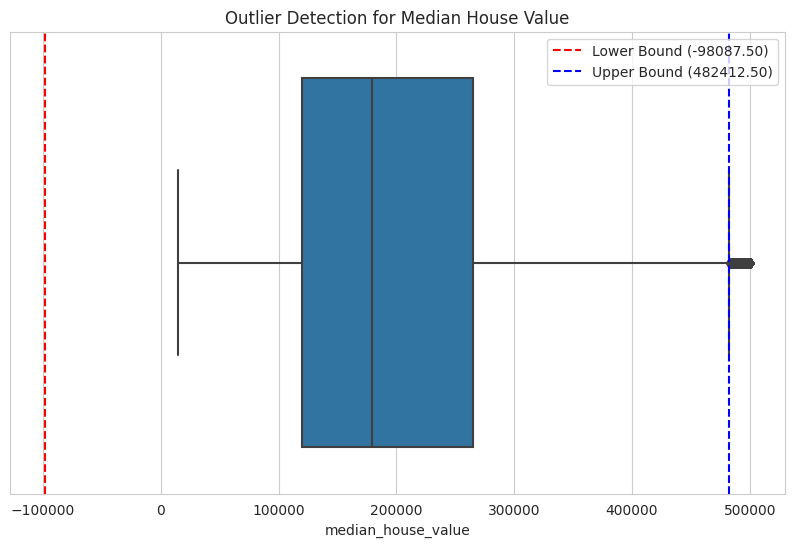

In [10]:
# Outlier Detection for `median_house_value`
q1 = housing_data['median_house_value'].quantile(0.25)
q3 = housing_data['median_house_value'].quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

# Flagging the outliers in the dataset
outliers = housing_data[(housing_data['median_house_value'] < lower_bound) |
                        (housing_data['median_house_value'] > upper_bound)]

# Visualize the outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=housing_data['median_house_value'])
plt.axvline(lower_bound, color='r', linestyle='--', label=f'Lower Bound ({lower_bound:.2f})')
plt.axvline(upper_bound, color='b', linestyle='--', label=f'Upper Bound ({upper_bound:.2f})')
plt.title('Outlier Detection for Median House Value')
plt.legend()
plt.show()

## 4. Handling Null Values

Handle missing values in the `total_bedrooms` column by replacing them with the median value of the column.

In [11]:
# Handling Null Values for `total_bedrooms`
median_bedrooms = housing_data['total_bedrooms'].median()
housing_data_filled = housing_data.copy()
housing_data_filled['total_bedrooms'].fillna(median_bedrooms, inplace=True)

# Check for null values
null_check = housing_data_filled.isnull().sum()
null_check

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

## 5. Feature Correlation Analysis

Analyze the correlation of features with the target variable (`median_house_value`).

<ipython-input-12-84e21d4d947f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = housing_data_filled.corr()


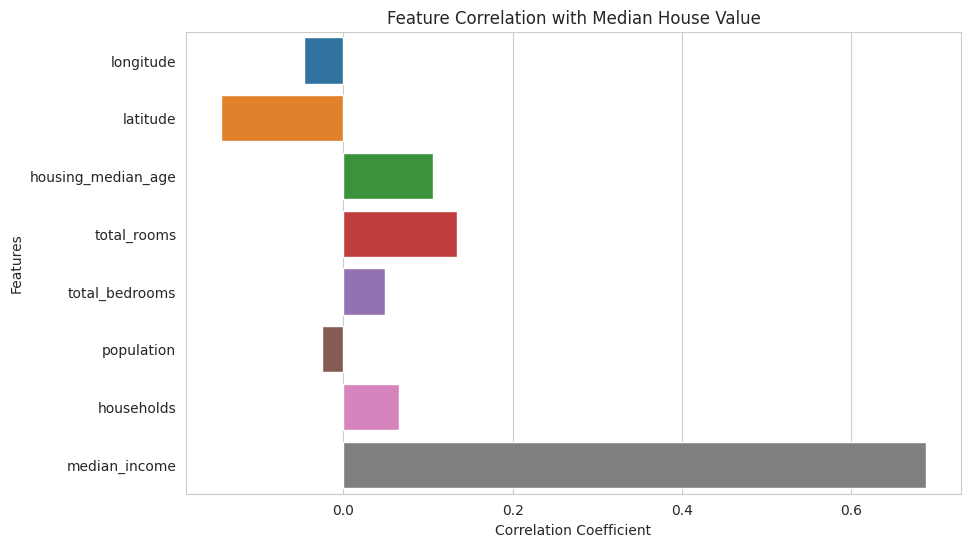

In [12]:
# Feature Correlation with Prediction Labels
correlation_matrix = housing_data_filled.corr()
# Visualizing the correlation with target variable
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_matrix['median_house_value'].drop('median_house_value'),
            y=correlation_matrix.drop('median_house_value').index)
plt.title('Feature Correlation with Median House Value')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

## 6. Encoding Categorical Variables

Perform one-hot encoding for the `ocean_proximity` categorical variable.

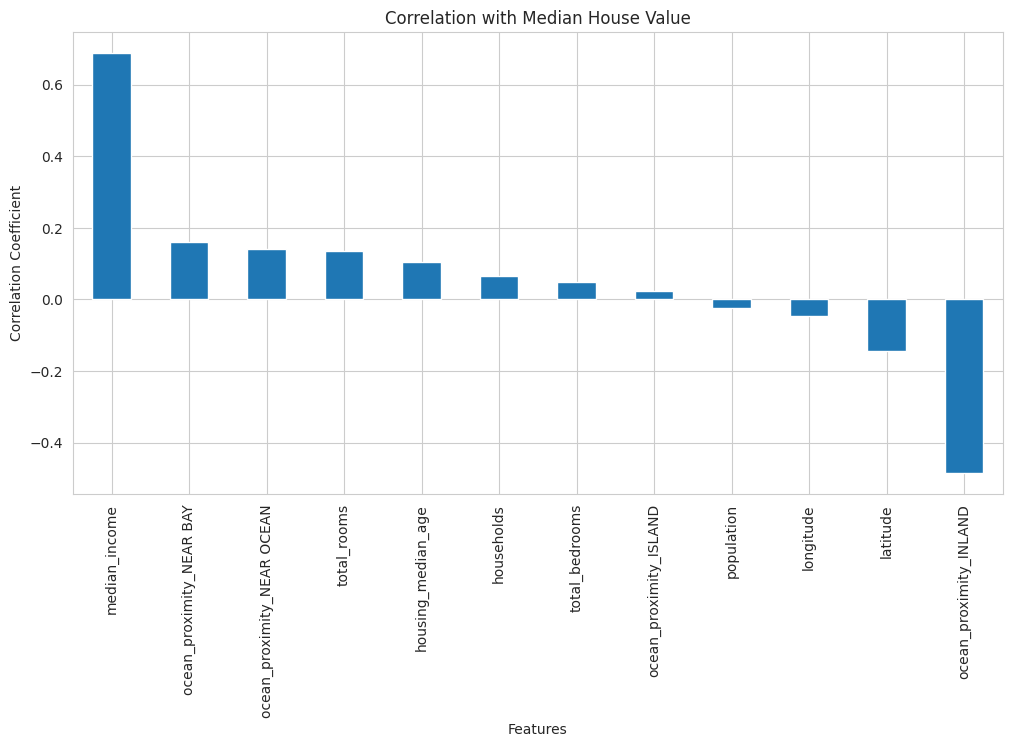

In [13]:
# Encoding the `ocean_proximity` categorical variable one hoyt encoding
housing_data_encoded = pd.get_dummies(housing_data_filled, columns=['ocean_proximity'], drop_first=True)

# Displaying the correlation of encoded features with the target variable
encoded_corr = housing_data_encoded.corr()['median_house_value'].sort_values(ascending=False)
encoded_corr.drop('median_house_value').plot(kind='bar', figsize=(12, 6), title='Correlation with Median House Value')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()


## 7. Dimensionality Reduction and Visualization

Apply PCA to reduce the dimensions of the data and visualize it in a 2D space formed by the first two principal components.

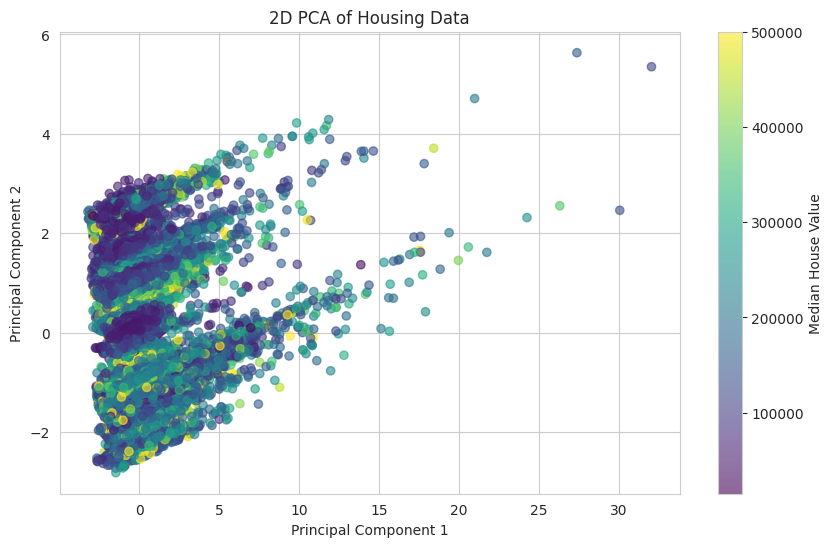

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Features and target
X = housing_data_encoded.drop('median_house_value', axis=1)
y = housing_data_encoded['median_house_value']

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA and reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratio of the principal components
explained_variance_ratio = pca.explained_variance_ratio_

# Visualization
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.6)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of Housing Data')
plt.colorbar(label='Median House Value')
plt.show()

In [22]:
X_pca

array([[-2.29902221,  2.22275156],
       [ 2.72035329,  2.89368888],
       [-2.18004677,  2.32003613],
       ...,
       [-0.45009261,  1.72954593],
       [-0.86149152,  1.70088048],
       [ 0.13630984,  1.78366781]])